In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [3]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
data.shape

(962, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
data['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

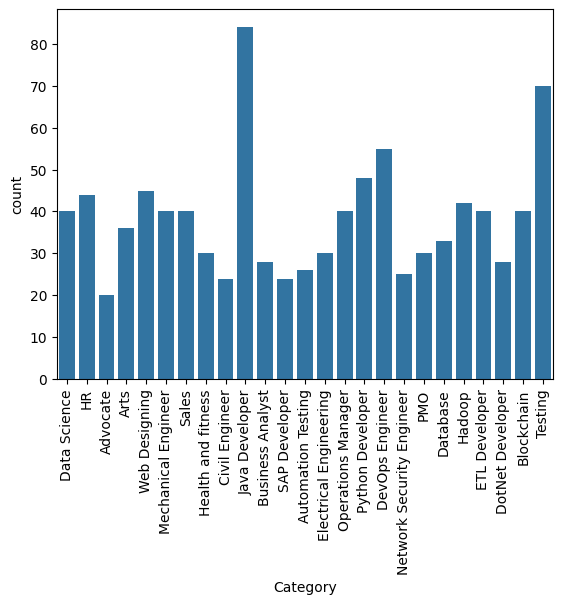

In [9]:
sns.countplot(data = data , x = data['Category'])
plt.xticks(rotation = 90);

In [10]:
data['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
sw = set(stopwords.words("english"))
sws = list(sw)

In [14]:
def clean(text):
  text = text.lower()

  text = re.sub(r'<.*?>' , ' ' , text)

  text = re.sub(r'[^a-zA-Z]' , ' ' , text)

  text = re.sub(r'hana' , ' ' , text)

  text = re.sub(r'exprience' , 'experience' , text)

  text = re.sub(r'le' , '1' , text)

  text = re.sub(r'kera' , 'keras' , text)

  text = re.sub(r'matelabs' , 'mathlab' , text)

  text = re.sub(r'matlab' , 'mathlab' , text)

  text = re.sub(r'1arning' , 'learning' , text)

  text = re.sub(r'tab1au' , 'tableau' , text)

  text = re.sub(r'e1ctric' , 'electric' , text)

  text = re.sub(r'e1ctrical' , 'electric' , text)

  text = re.sub(r'profi1r' , 'profile' , text)

  text = re.sub(r'col1ge' , 'college' , text)

  text = re.sub(r'responsib1' , 'responsible' , text)

  text = re.sub(r'c1aning' , 'cleaning' , text)

  text = re.sub(r'simp1' , 'simple' , text)

  text = re.sub(r'serf' , 'server' , text)

  text = re.sub(r'acce1rating' , 'accelerating' , text)

  text = nltk.word_tokenize(text)

  text = [word for word in text if word not in sws]

  text = [word for word in text if len(word)>3]

  lemm = WordNetLemmatizer()
  text = [lemm.lemmatize(word) for word in text]

  return " ".join(text)

In [15]:
data['Resume'] = data['Resume'].apply(lambda x: clean(x))

In [16]:
data.head()

,Category,Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail rgpv data scientist data scie...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill python tableau lumira linear programming...
4,Data Science,education detail ymcaust faridabad haryana dat...


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Category'] = le.fit_transform(data['Category'])

In [21]:
vector = TfidfVectorizer()

restext = vector.fit_transform(data['Resume']).toarray()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [23]:
x_train , x_test , y_train , y_test = train_test_split(restext ,
                                                       data['Category'] ,
                                                       test_size = 0.2 ,
                                                       stratify = data['Category'] ,
                                                       random_state = 2)

In [24]:
lr = GridSearchCV(LogisticRegression() ,
                  {
                      'penalty':['l1','l2','elasticnet','None']
                  } ,
                  cv = 5)

lr.fit(x_train , y_train)

lr.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

{'penalty': 'l2'}

In [26]:
lrr = LogisticRegression( penalty = 'l2')
lrr.fit(x_train , y_train)
lrr.score(x_test , y_test)

0.9948186528497409

In [27]:
dtc = GridSearchCV(DecisionTreeClassifier() ,
                   {
                       'criterion':['gini', 'entropy', 'log_loss'],
                       'splitter':['best','random']
                   } ,
                   cv = 5)

dtc.fit(x_train , y_train)

dtc.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [28]:
dtcc = DecisionTreeClassifier( criterion = 'gini' , splitter = 'best' )
dtcc.fit(x_train , y_train)
dtcc.score(x_test , y_test)

0.9948186528497409

In [29]:
knn = GridSearchCV( KNeighborsClassifier() ,
                   {
                       'algorithm':['auto','ball_tree','kd_tree','brute']
                   } ,
                    cv = 5)

knn.fit(x_train , y_train)

knn.best_params_

{'algorithm': 'auto'}

In [30]:
knnn = KNeighborsClassifier( algorithm = 'auto')
knnn.fit(x_train , y_train)
knnn.score(x_test , y_test)

0.9896373056994818

In [31]:
svcc = SVC()
svcc.fit(x_train , y_train)
svcc.score(x_test , y_test)

0.9948186528497409

In [32]:
mresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [33]:
import joblib

In [38]:
tfidf_vectorizer = TfidfVectorizer()

In [40]:
tfidf_vectorizer.fit_transform(data['Resume']).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.03113602, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
joblib.dump(tfidf_vectorizer , 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [42]:
loaded_tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [43]:
new_document_tfidf = loaded_tfidf_vectorizer.transform([mresume])
print(new_document_tfidf)

  (0, 5549)	0.03201535923117941
  (0, 5521)	0.07123686764176072
  (0, 5431)	0.0820849863629729
  (0, 5420)	0.3076395660658314
  (0, 5356)	0.03611652685620785
  (0, 5184)	0.10270929115403946
  (0, 5127)	0.08949575781527998
  (0, 5085)	0.06761175774962869
  (0, 5029)	0.09197675558356717
  (0, 5005)	0.0644530722443153
  (0, 4861)	0.056778860634660235
  (0, 4829)	0.057493906650304086
  (0, 4784)	0.0820849863629729
  (0, 4668)	0.08837682711691923
  (0, 4417)	0.2509866037032355
  (0, 4075)	0.1393894975014465
  (0, 4009)	0.06761175774962869
  (0, 3953)	0.09341061654281549
  (0, 3867)	0.0930210077607799
  (0, 3855)	0.0648925157672138
  (0, 3786)	0.09197675558356717
  (0, 3771)	0.07635945136767518
  (0, 3743)	0.0444147251584917
  (0, 3651)	0.07249072048717546
  (0, 3580)	0.09835215027464017
  :	:
  (0, 1570)	0.13522351549925737
  (0, 1528)	0.08063936535591978
  (0, 1443)	0.04365897996601781
  (0, 1440)	0.046902326396063815
  (0, 1420)	0.05592462833583504
  (0, 1400)	0.05273588297693196
  (0, 13

In [46]:
predd = knn.predict(new_document_tfidf)[0]

In [48]:
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

In [49]:
category_name = category_mapping.get(predd)
print(category_name)

Data Science
